In [4]:
import os
import cv2
from matplotlib import pyplot as plt

In [2]:
from deepface import DeepFace

In [6]:
from mtcnn import MTCNN
detector = MTCNN()

In [11]:
img = cv2.cvtColor(cv2.imread("dataset/casiaface/000/000_1.bmp"), cv2.COLOR_BGR2RGB)

In [12]:
detected = detector.detect_faces(img)

1/1 [==============================] - 0s 16ms/step


In [13]:
detected

[{'box': [317, 177, 83, 103],
  'confidence': 0.9986276626586914,
  'keypoints': {'left_eye': (340, 220),
   'right_eye': (377, 215),
   'nose': (359, 239),
   'mouth_left': (346, 258),
   'mouth_right': (379, 254)}}]

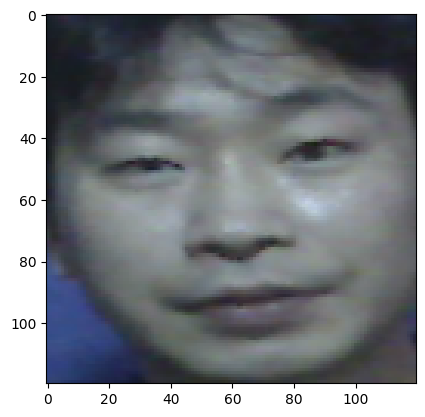

In [16]:
x,y,w,h = detected[0]["box"]
cropped = cv2.resize(img[y:y+h,x:x+w], (120, 120), interpolation = cv2.INTER_LINEAR)
plt.imshow(cropped)

In [19]:
for i in range(3):
    subject_id = str(i).zfill(3)
    subject_path = f"dataset/casiaface/{subject_id}"
    print(subject_path)
    for j in range(5):
        img_path = f"{subject_path}/{subject_id}_{j}.bmp"
        img = cv2.imread(img_path)
        # img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        detected = detector.detect_faces(img)
        x,y,w,h = detected[0]["box"]
        cropped = cv2.resize(img[y:y+h,x:x+w], (120, 120), interpolation=cv2.INTER_LINEAR)
        cv2.imwrite(f"dataset/casia_cropped/{subject_id}/{subject_id}_{j}.jpg", cropped)

dataset/casiaface/000
1/1 [==============================] - 0s 15ms/step
dataset/casiaface/001
1/1 [==============================] - 0s 14ms/step
dataset/casiaface/002
1/1 [==============================] - 0s 15ms/step
